# COMP471 Assignment 4
## Question 1

Implemented a P function and Q function which are two distributions. accept with probability minimum(1,...)

In [73]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
import math
# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

np.set_printoptions(precision = 2)

In [125]:
def Pstar(v):## for each x,y pair
    Pstar = np.log(np.exp(-np.sum(v*v/40.)) * np.power((np.abs(v[0])/(1. + np.abs(v[1]))),  4.0))
#     Pstar = np.exp(-np.sum(v*v/40.)) * np.power((np.abs(v[0])/(1. + np.abs(v[1]))),  4.0)

    return Pstar
    

In [182]:
def Qstar(z):## for each x,y pair
    Qstar  = np.log(np.exp(-np.sum(v*v)/40))
    return Qstar

In [187]:
def make_Metropolis_Samples():
    # Metropolis parameters
    
    upper_bounds = [1, 1] ## ranges for x and y first column for x and second column for y   
    lower_bounds = [-1, -1] 
    num_samples = 1000
    gap_between_samples = 100
    sigma_proposal = 0.05     # initial width of the proposal distribution
    num_samples_per_chain = 1
    
    all_samples = [] # recording the accepeted samples 
    while (len(all_samples) < num_samples):
        
        v = ([np.random.uniform(lower_bounds[0],upper_bounds[0]),np.random.uniform(lower_bounds[1],upper_bounds[1])])
        v = np.reshape(v, (-1, 2))
        v = v[0]
        print(v)

        # Metropolis 
        num_proposed, num_accepted, num_sampled_this_chain=0,0,0
        while (num_sampled_this_chain < num_samples_per_chain) and (len(all_samples) < num_samples):
            for t in range(gap_between_samples):
                ## change here to pstar and qstar
#                 prop_theta = Pstar(theta, sigma_proposal)
#                 a=a1*a2
#                 a1 = Pstar(v)
#                 a2 = Qstar(v)
#                 num_proposed += 1
#                 if a > 1
#                 prop_log_post = calc_log_posterior(prop_theta,partX,partT,hyperparameters)
                
#                 if (prop_log_post > log_post) or (np.exp((prop_log_post-log_post)) > rng.random()): 
#                     theta, log_post = prop_theta, prop_log_post
#                     num_accepted += 1

#             all_samples.append(theta)  
#             num_sampled_this_chain += 1
                if(p > q) or (np.exp((p-q))> rng.random()):
                    num_accepted +=1
                    all_samples.append(v)
    print(len(all_samples))
    return all_samples

In [190]:

m = make_Metropolis_Samples()
print(m[100])


[-0.49 -0.26]
1000
[-0.49 -0.26]


## Question 2 

Code based on https://gitlab.ecs.vuw.ac.nz/lms/comp471/probabilistic_machine_learning_2020/-/blob/master/notebooks/markov-messages.ipynb
(The code is demostrating a mc, where we need to modifiy it to make it become HMM. )


In [34]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
np.set_printoptions(precision = 2)
# I want tick labels at the top, like in lectures
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
matplotlib.rcParams['figure.dpi'] = 120
# rng.seed(471)

In [35]:
def onehot(j,n):
    # returns a one-hot vector of size n.
    z = np.zeros(n)
    z[j]=1
    return(z)

In [36]:
ns_h=3 # has ns_h entries for hidden chain
ns_o=3 #has ns_o entries for observation
import string
stateNames = string.ascii_uppercase[:ns_h]
stateNames_y = string.ascii_lowercase[:ns_o]

# Make up a prior for the initial state. I call this M0
M0 = rng.random(ns_h)#state transition matrix
#make up a prior for the initial state for y called by E0
E0 = rng.random(ns_o)#emission probability matrix

# Make up a transition matrix. Some examples might be commented out here.
# M = np.array([[.9,0,.1],[.1,.9,0],[0,.1,.9]])   # a slow rock-paper-scissors cycle!
M = np.array([[.1,0,.5],[.9,.1,0],[0,.9,.5]])   # same, but faster, and 2-->0 is slower.
E =np.array([[.9,0,.1],[.1,.9,0],[0,.1,.9]])


# M = rng.random((ns_h,ns_h))  # totally made-up transition matrix
# E = rng.random((ns_o,ns_o))
M = M / M.sum(0) # just to be sure it's normalised down the cols.
E = E/ E.sum(0)


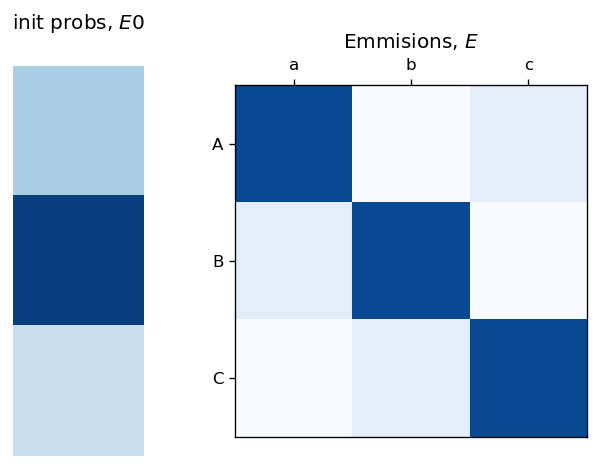

In [37]:
fig, ax= plt.subplots(1,2)
ax[0].imshow(np.atleast_2d(E0).T, cmap='Blues', vmin=0,vmax=1)
ax[0].set_title(r'init probs, $E0$'); ax[0].axis('off')
ax[1].imshow(E, cmap='Blues', vmin=0,vmax=1)
dum = ax[1].set_title(r'Emmisions, $E$')
dum = plt.setp(ax[1], xticks=range(ns_o), xticklabels=stateNames_y, yticks=range(ns_o), yticklabels=stateNames)
plt.tight_layout()

But the states of x are hidden here is just a demonstration of x (imagine we cant see it)

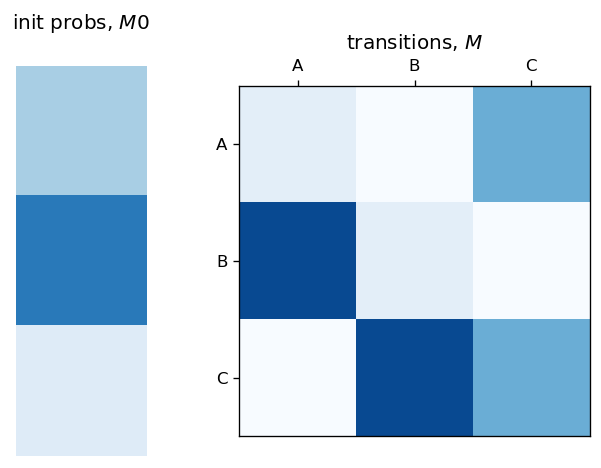

In [38]:
fig, ax= plt.subplots(1,2)
ax[0].imshow(np.atleast_2d(M0).T, cmap='Blues', vmin=0,vmax=1)
ax[0].set_title(r'init probs, $M0$'); ax[0].axis('off')
ax[1].imshow(M, cmap='Blues', vmin=0,vmax=1)
dum = ax[1].set_title(r'transitions, $M$')
dum = plt.setp(ax[1], xticks=range(ns_h), xticklabels=stateNames, yticks=range(ns_h), yticklabels=stateNames)
plt.tight_layout()


In [46]:
nt=20  # this is the length of the sequence (time steps )
no_obs = 2
obs={} # now the observation become y instead of x 
for i in range(no_obs): 
    obs[rng.randint(nt)] = rng.randint(ns_o)

# OR INSTEAD, FOR TESTING, let's just ordain the first and last states.    
obs ={0:0, 9:2, 15:0}

print(obs)

{0: 0, 9: 2, 15: 0}


In [47]:
 # messages going from vars to factors...   # here is still MM
msg_forw_to_factor = np.zeros((ns_o,nt))  # 'D' for msg heading Down-stream
msg_back_to_factor = np.zeros((ns_o,nt))  # 'U' for msg heading Up-stream

# messages going from factors to vars...
msg_forw_to_var = np.zeros((ns_o,nt))  
msg_back_to_var = np.zeros((ns_o,nt))  

# messages going from y to factors
msg_y_to_factor = np.zeros((ns_o,nt))  
# messages from factor on y side to var
msg_yfactor_to_var = np.zeros((ns_o,nt)) ## just E matrix

In [48]:
for t in range(nt):
    # first we do the message leaving the var node, going forwards / downstream
    if t==0:
        # special case because has it's very own factor
        msg_forw_to_var[:,t] = M0 # nb. does not matter, but anyway!
    else:
        upstream_msg = msg_forw_to_factor[:,t-1]
        msg_forw_to_var[:,t] = (M * upstream_msg).sum(1).reshape(ns_h)        
        # Note that all factor nodes are the same, namely the matrix of conditional probs, `M'
        # nb. numpy is automatically doing the "tiling" of the FROM msg into the shape of M, here.
    

    if t in obs: # there's an observation - this beats any inference guesswork!
        msg_y_to_factor[:,t] =  (E.T *onehot(obs[t],ns_o)).sum(1).reshape(ns_o)
        msg_forw_to_factor[:,t] =   msg_y_to_factor[:,t] # the observed value, one-hot encoded
    else:
        msg_forw_to_factor[:,t] = msg_forw_to_var[:,t] # default is it goes straight through the variable node.

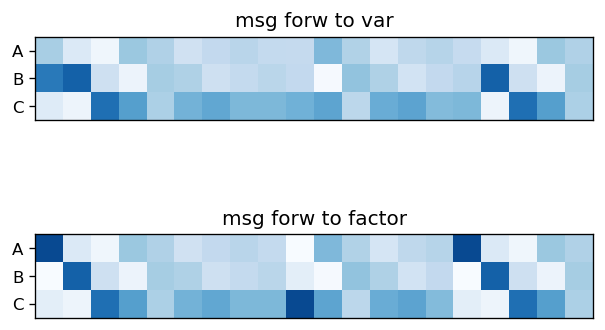

In [49]:
 fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.imshow(msg_forw_to_var, cmap='Blues', vmin=0,vmax=1)
dum = ax1.set_title('msg forw to var')
ax2.imshow(msg_forw_to_factor, cmap='Blues', vmin=0,vmax=1)
dum = ax2.set_title('msg forw to factor')
dum = plt.setp((ax1,ax2), xticks=[], yticks=range(ns_h), yticklabels=stateNames)

In [50]:
for t in reversed(range(nt)):
    if t == nt-1: # last one is special case: incoming back msg is just a dummy vector of ones.
        msg_back_to_var[:,t] = np.ones(ns_h)/ns_h
    else:
        upstream_msg = msg_back_to_factor[:,t+1]
        msg_back_to_var[:,t] = (M.T * upstream_msg).sum(1).reshape(ns_h)    
    
    if t in obs: # there's an observation - this beats any inference guesswork!
        msg_back_to_factor[:,t] = (E.T*onehot(obs[t],ns_o)).sum(1).reshape(ns_o) # the observed value, one-hot encoded
    else:
        msg_back_to_factor[:,t] = msg_back_to_var[:,t] # default is it goes straight through the variable node.

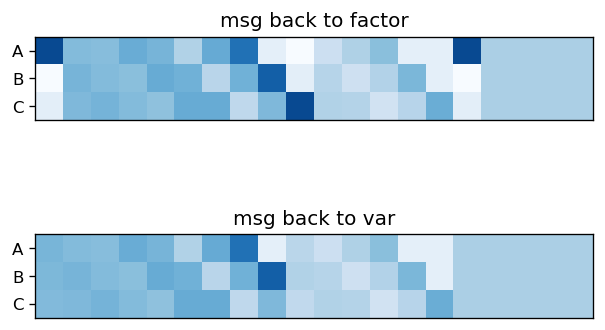

In [51]:
 fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.imshow(msg_back_to_factor, cmap='Blues', vmin=0,vmax=1)
dum = ax1.set_title('msg back to factor')
ax2.imshow(msg_back_to_var, cmap='Blues', vmin=0,vmax=1)
dum = ax2.set_title('msg back to var')
dum = plt.setp((ax1,ax2), xticks=[], yticks=range(ns_h), yticklabels=stateNames)

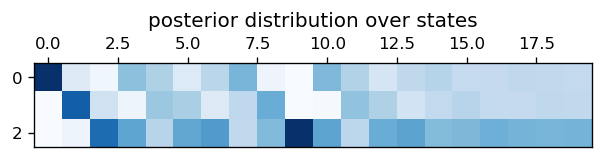

In [45]:
 px = np.zeros((ns_h,nt))
px =  msg_forw_to_var * msg_back_to_var
for t in obs: px[:,t] = onehot(obs[t],ns_h)
    
px = px / px.sum(0)
fig, ax = plt.subplots(1,1)
ax.imshow(px, cmap='Blues', vmin=0,vmax=1)
dum = ax.set_title('posterior distribution over states')